## Project 03: Feedback and Satisfaction Survey Analysis
### Description
This project will analyze participant feedback from surveys to enhance future training sessions and understand the participants’ experiences better.

### Data Points
- Satisfaction scores on various aspects of the program (content, teaching methods, etc.)
- Qualitative feedback from open-ended survey questions
- Suggestions for improvement
### Methodology
- Administer satisfaction surveys to all participants at the end of the training.
- Perform quantitative analysis of satisfaction scores and conduct sentiment analysis on qualitative feedback.
- Identify common themes and suggestions for program improvement.
### Expected Outcomes
- Comprehensive understanding of participants' satisfaction with the program.
- Actionable recommendations for enhancing future GED training sessions.
- Increased participant engagement through responsive program adjustments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ged_module import *

In [2]:
df = pd.read_csv('./data/survey.csv', index_col = 0)

(28, 1) (67, 1)


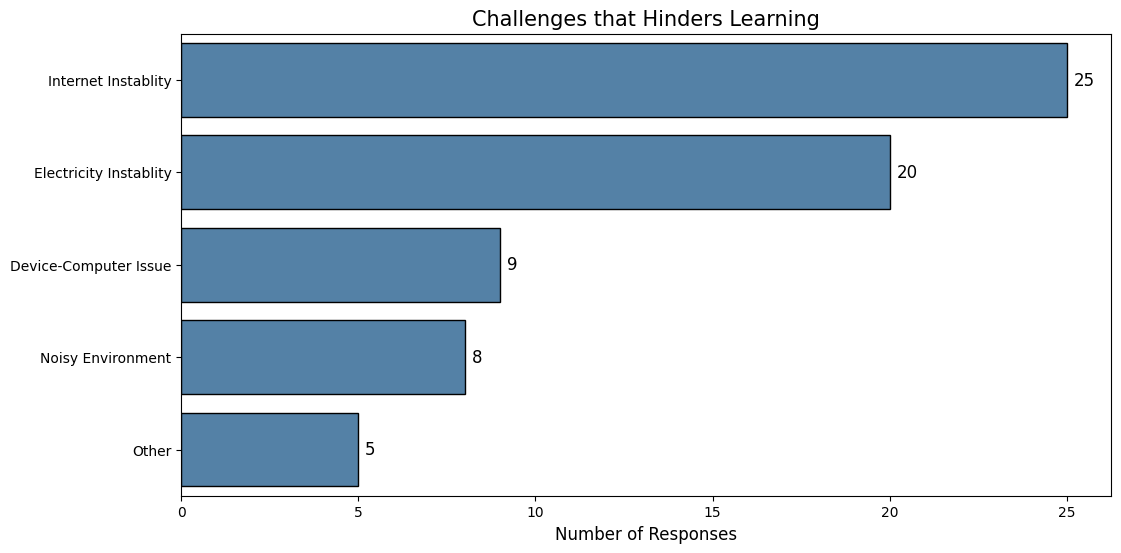

In [3]:
col_name = 'Online_Learning_Difficulty'
ylabels = ['Internet Instablity', 'Electricity Instablity', 'Device-Computer Issue', 'Noisy Environment', 'Other']
df_temp = df[[col_name]].copy()
df_temp[col_name] = df_temp[col_name].str.split(',')
df_exploded = df_temp.explode(col_name)
df_exploded[col_name] = df_exploded[col_name].str.strip().str.title()
print(df_temp.shape, df_exploded.shape)
d_counts = df_exploded[col_name].value_counts()
d_more_than_once = list(d_counts[d_counts > 1].index)
df_exploded[col_name]  = df_exploded[col_name].apply(lambda x: x.title() if x in d_more_than_once else 'Other')
order = df_exploded[col_name].value_counts().index


plt.figure(figsize = (12,6))
ax = sns.countplot(data=df_exploded, y=col_name, order=order, edgecolor='black', orient = 'h', color='#4682B4')
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 12, padding = 5)
plt.title("Challenges that Hinders Learning", fontsize = 15)
plt.yticks(ticks = range(len(ylabels)), labels = ylabels)
plt.ylabel("")
plt.xlabel('Number of Responses', fontsize = 12)
plt.show()

(28, 1) (60, 1)


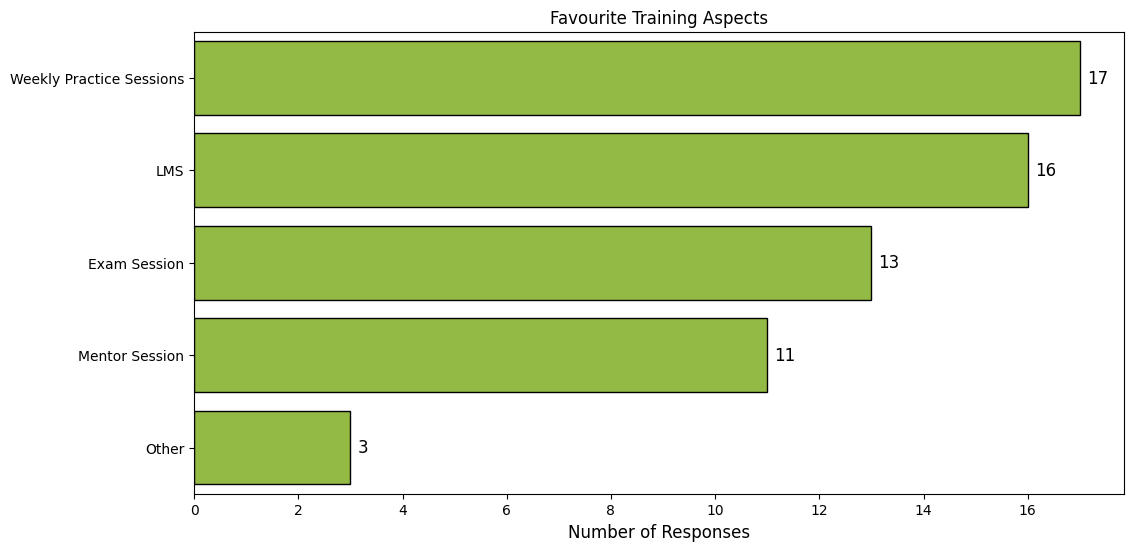

In [4]:
col_name = 'Training_Likes_Category'

df_temp = df[[col_name]].copy()
df_temp[col_name] = df_temp[col_name].str.split(',')
df_exploded = df_temp.explode(col_name)
df_exploded[col_name] = df_exploded[col_name].str.strip().str.title()
print(df_temp.shape, df_exploded.shape)
d_counts = df_exploded[col_name].value_counts()
d_more_than_once = list(d_counts[d_counts > 1].index)
df_exploded[col_name]  = df_exploded[col_name].apply(lambda x: x.title() if x in d_more_than_once else 'Other')
df_exploded[col_name]  = df_exploded[col_name].apply(lambda x: x.upper() if x=="Lms" else x)
order = df_exploded[col_name].value_counts().index

plt.figure(figsize = (12,6))
ax = sns.countplot(data=df_exploded, y=col_name, order=order, edgecolor='black', orient = 'h', color='yellowgreen')
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 12, padding = 5)
plt.title("Favourite Training Aspects")
plt.yticks(ticks = range(len(order)), labels = order)
plt.ylabel("")
plt.xlabel('Number of Responses', fontsize = 12)
plt.show()

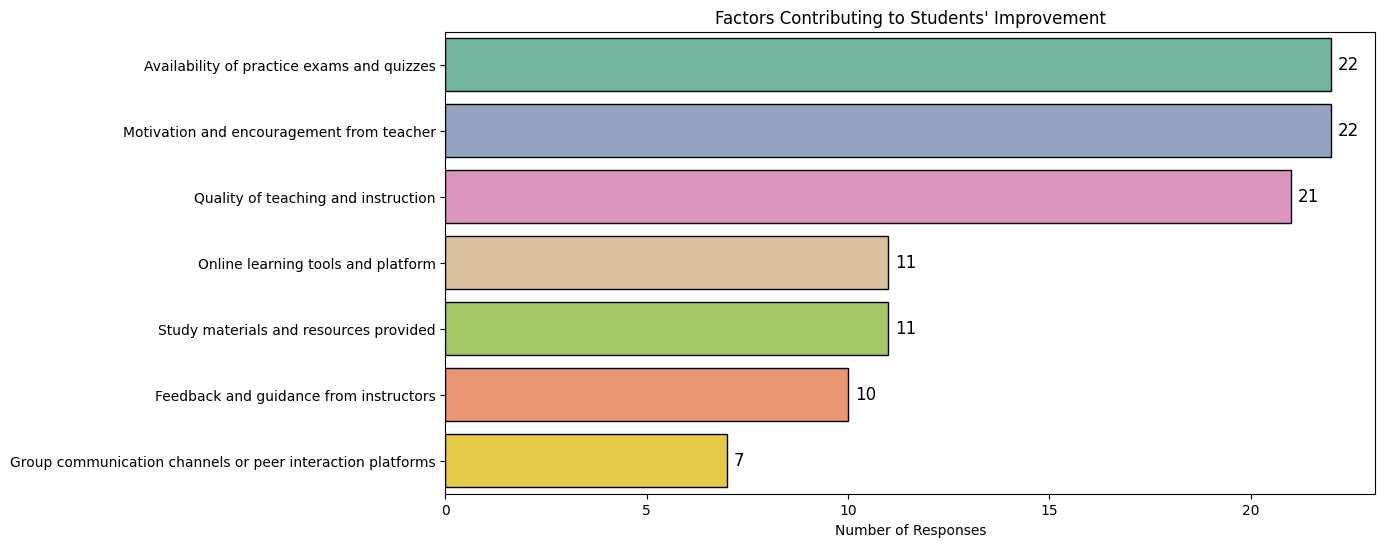

In [5]:
col_name = 'Top_GED_Contributors_List'
df_exploded = split_category(df,col_name, 'Top_GED_Contributors')
order = df_exploded[col_name].value_counts().index
plt.figure(figsize = (12,6))
ax1 = sns.countplot(data=df_exploded, y=col_name, hue= col_name, palette='Set2', order=order, edgecolor='black')
for container in ax1.containers:
    ax1.bar_label(container, label_type = 'edge', fontsize = 12, padding = 5)
plt.title("Factors Contributing to Students' Improvement")
plt.xlabel('Number of Responses')
plt.ylabel('')
plt.show()

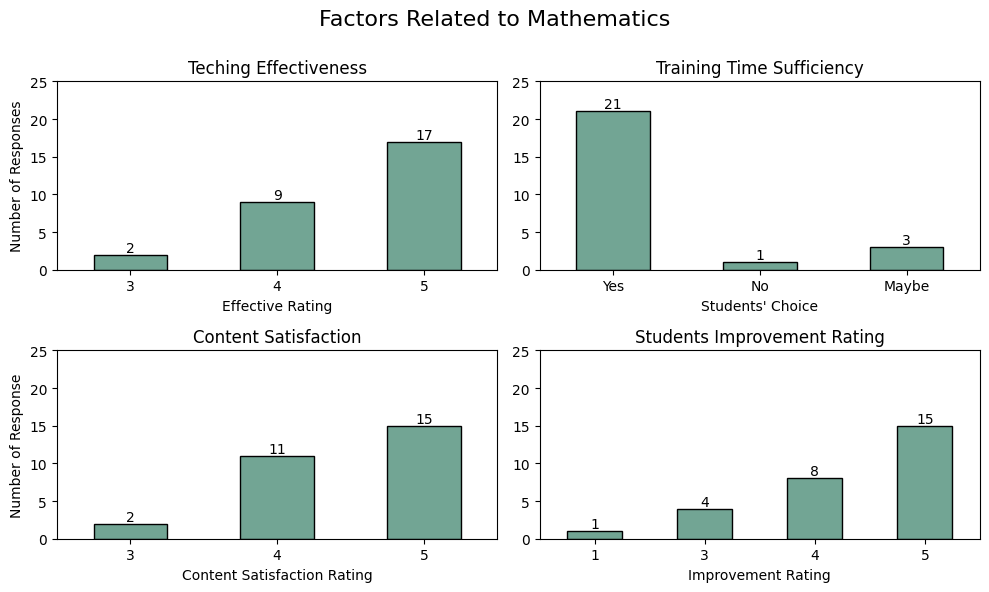

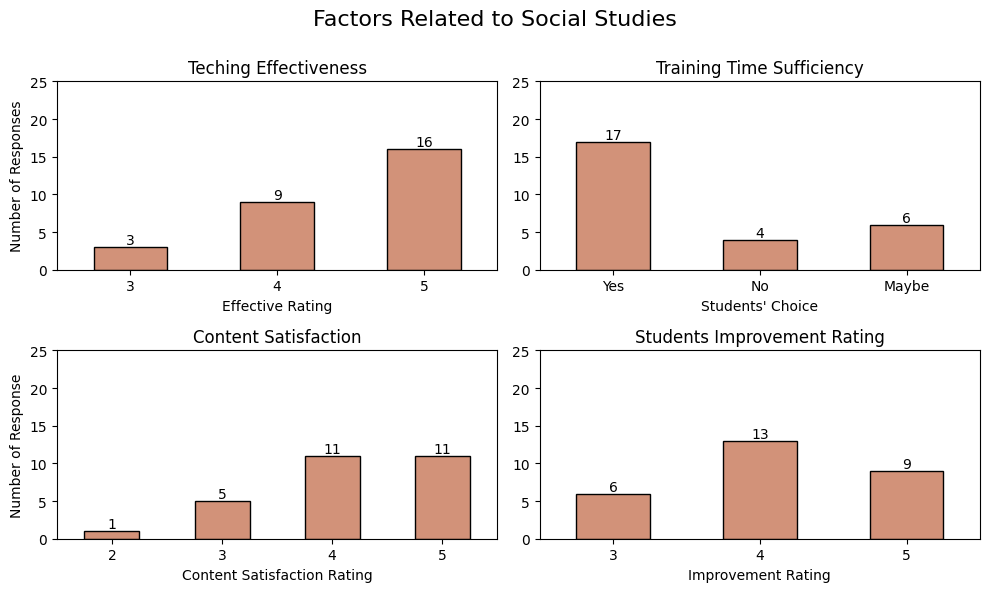

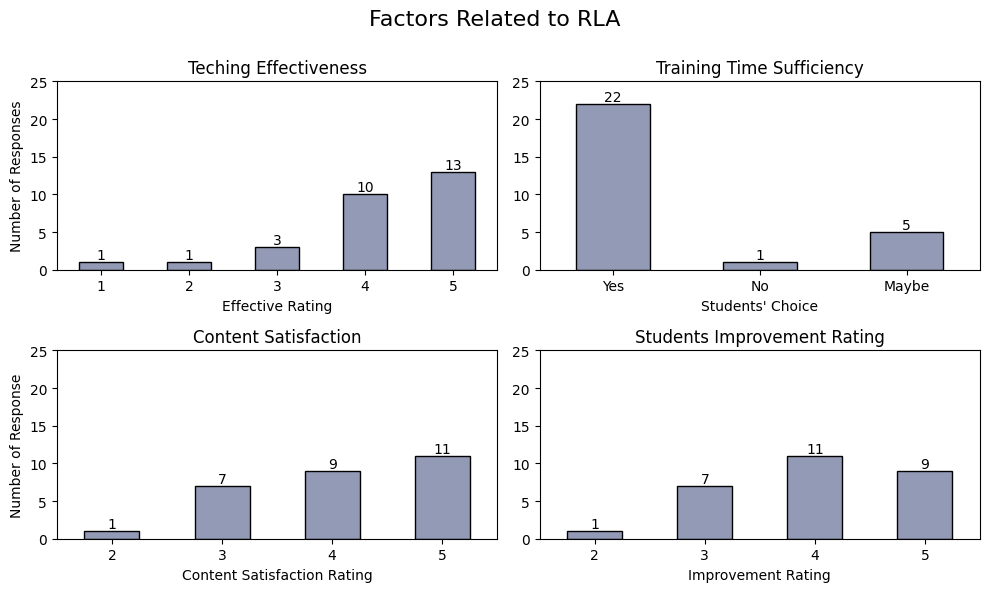

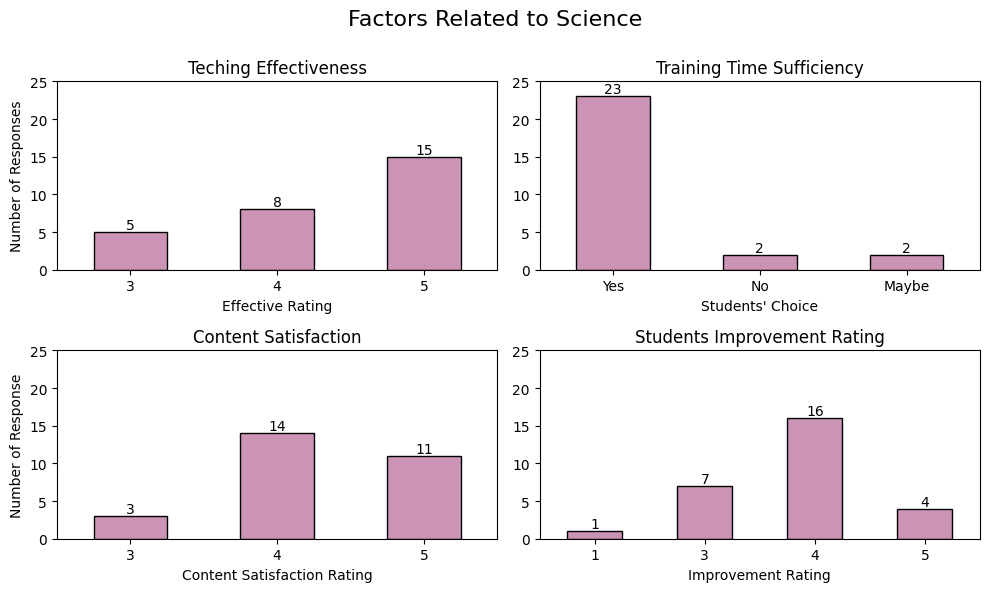

In [6]:
plot_each_subjects_analysis('Factors Related to Mathematics', df, 'Math_Teaching_Effectiveness', 'Math_Time_Sufficient', 'Math_Content_Satisfaction', 'Math_Skills_Improved', '#6AAD97')
plot_each_subjects_analysis('Factors Related to Social Studies', df, 'SS_Teaching_Effectiveness', 'SS_Time_Sufficient', 'SS_Content_Satisfaction', 'SS_Skills_Improved', '#E18B6A')
plot_each_subjects_analysis('Factors Related to RLA', df, 'RLA_Teaching_Effectiveness', 'RLA_Time_Sufficient', 'RLA_Content_Satisfaction', 'RLA_Skills_Improved', '#8D97BB')
plot_each_subjects_analysis('Factors Related to Science', df, 'Science_Teaching_Effectiveness', 'Science_Time_Sufficient', 'Science_Content_Satisfaction', 'Science_Skills_Improved', '#D48BB8')

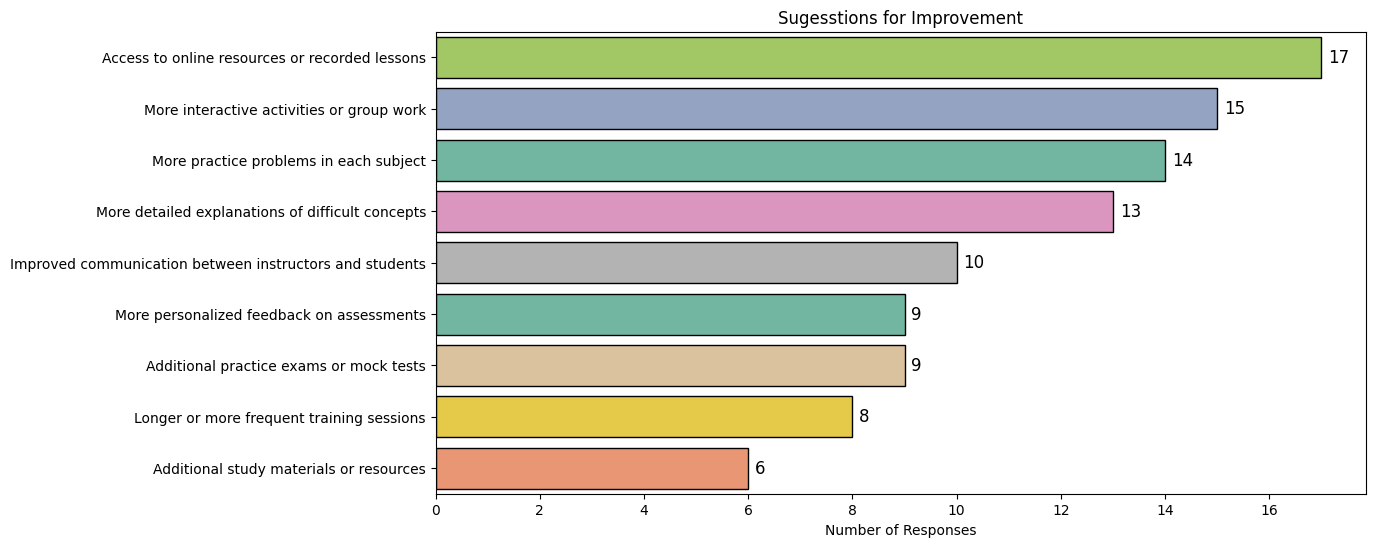

In [7]:
col_name = 'GED_Improvement_Recommendations_List'
df_exploded = split_category(df, 'GED_Improvement_Recommendations_List', 'GED_Improvement_Recommendations')
order = df_exploded[col_name].value_counts().index

plt.figure(figsize = (12,6))
ax = sns.countplot(data=df_exploded, y=col_name,hue = col_name, palette='Set2', order=order, edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, label_type = 'edge', fontsize = 12, padding = 5)

plt.title("Sugesstions for Improvement")
plt.xlabel('Number of Responses')
plt.ylabel('')
plt.show()
